# Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase- 

# Data Collection Phase 

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model 
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. 
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

# Model Building Phase 

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. 
Follow the complete life cycle of data science. Include all the steps like. 
1.	Data Cleaning 
2.	Exploratory Data Analysis 
3.	Data Pre-processing 
4.	Model Building 
5.	Model Evaluation 
6.	Selecting the best model 
 

# Data Collection

# Importing necessary libraries

In [34]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Website

In [2]:
website = 'https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=&maximum_distance=30&mileage_max=&page_size=20&sort=best_match_desc&stock_type=used&year_max=2022&year_min=2018&zip='

In [3]:
response = requests.get(website)

In [4]:
response.status_code

200

In [5]:
soup = BeautifulSoup(response.content,'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html class="ep-theme-cars" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">Used Vehicles for Sale | Cars.com</title>
<meta content="Shop used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="Used Vehicles for Sale | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results" property="og:url"/>
<meta content="Shop used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." property="og:description"/>
<meta content="https://graphics.cars.com/images/core/log

In [7]:
results = soup.find_all('div',{'class':'vehicle-card'})

In [8]:
len(results)

20

In [9]:
results[0].find('h2').get_text()

'2019 Jeep Cherokee Limited'

In [18]:
results[0].find('div',{'class':'mileage'}).get_text()

'53,848 mi.'

In [19]:
results[0].find('span',{'class':'sds-rating__count'}).get_text()

'2.8'

In [20]:
results[0].find('span',{'class':'sds-rating__link sds-button-link'}).get_text()

'(707 reviews)'

In [21]:
results[0].find('span',{'class':'primary-price'}).get_text()

'$22,477'

In [22]:
results[0].find('div',{'class':'dealer-name'}).get_text().strip()

'Mossy Toyota'

In [23]:
results[0].find('p',{'class':'stock-type'}).get_text()

'Used'

In [24]:
Condition =[]
Model = []
Dealer_name = []
Mileage = []
Ratings = []
Reviews = []
Price = []

In [31]:
for i in range(1,301):
    for result in results:
        # Condition
        try:
            Condition.append(result.find('p',{'class':'stock-type'}).get_text())
        except :
            Condition.append('N/A')
    
        # Model
        try :
            Model.append(result.find('h2').get_text())
        except :
            Model.append('N/A')
        
        # Dealer_name
        try:
            Dealer_name.append(result.find('div',{'class':'dealer-name'}).get_text().strip())
        except :
            Dealer_name.append('N/A')
        
        # Mileage 
        try:
            Mileage.append(result.find('div',{'class':'mileage'}).get_text())
        except :
            Mileage.append('N/A')
        
        # Ratings
        try :
            Ratings.append(result.find('span',{'class':'sds-rating__count'}).get_text())
        except:
            Ratings.append('N/A')
        
        # Rating_counts
        try:
            Reviews.append(result.find('span',{'class':'sds-rating__link sds-button-link'}).get_text())
        except:
            Reviews.append('N/A')
        
        # Price
        try:
            Price.append(result.find('span',{'class':'primary-price'}).get_text())
        except:
            Price.append('N/A')
                 

In [32]:
Condition

['Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswagen Certified',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Used',
 'Volkswage

In [33]:
len(Condition)

18300

In [98]:
Model

['2020 Mercedes-Benz GLS 450 Base 4MATIC',
 '2022 Hyundai Santa Fe XRT',
 '2022 Mercedes-Benz GLC 300 Base 4MATIC',
 '2021 Mercedes-Benz GLC 300 Base 4MATIC',
 '2019 Lexus LX 570 570',
 '2020 Mercedes-Benz AMG CLA 45 Base 4MATIC',
 '2018 BMW 430 i',
 '2021 Audi Q5 e 55 Premium',
 '2018 GMC Sierra 1500 SLT',
 '2019 FIAT 124 Spider Abarth',
 '2018 Acura RLX Sport Hybrid Advance Package',
 '2019 Nissan Leaf SV',
 '2020 Cadillac Escalade Premium Luxury',
 '2018 Lexus GS 350 F Sport',
 '2020 INFINITI QX60 Pure',
 '2021 Mazda CX-3 Sport',
 '2022 Kia Carnival SX Prestige',
 '2021 Nissan NV Cargo NV2500 HD S V6/S V8',
 '2021 RAM 1500 Laramie',
 '2021 Hyundai Elantra SEL',
 '2018 Lincoln Navigator Black Label',
 '2020 Mercedes-Benz GLS 450 Base 4MATIC',
 '2022 Hyundai Santa Fe XRT',
 '2022 Mercedes-Benz GLC 300 Base 4MATIC',
 '2021 Mercedes-Benz GLC 300 Base 4MATIC',
 '2019 Lexus LX 570 570',
 '2020 Mercedes-Benz AMG CLA 45 Base 4MATIC',
 '2018 BMW 430 i',
 '2021 Audi Q5 e 55 Premium',
 '2018 G

In [99]:
len(Model)

6300

In [100]:
Dealer_name

["O'Meara Ford",
 'Suntrup Hyundai South',
 'Mercedes-Benz of Chantilly',
 'Smith Motor Sales of Haverhill, Inc.',
 'Giles Nissan Lafayette',
 'Gaudin Porsche of Las Vegas',
 'Gabriel/Jordan Chevrolet Cadillac',
 'Lexus of Henderson',
 'Billingsley Hyundai',
 'Greg LeBlanc Hyundai',
 'Velocity Auto Sales',
 'Deery Brothers Chrysler Dodge Jeep Ram of Waukee',
 'Schoepp Motors West',
 'Prestige Motorworks LLC',
 'Pischke Motors of La Crosse',
 'Chevrolet of Fayetteville',
 'Jake Sweeney Chrysler Jeep Dodge',
 'Orr Nissan of Fort Smith',
 'Boggus Tipton Chrysler Dodge Jeep Ram',
 'Jim Marsh Kia',
 'Elite Motors',
 "O'Meara Ford",
 'Suntrup Hyundai South',
 'Mercedes-Benz of Chantilly',
 'Smith Motor Sales of Haverhill, Inc.',
 'Giles Nissan Lafayette',
 'Gaudin Porsche of Las Vegas',
 'Gabriel/Jordan Chevrolet Cadillac',
 'Lexus of Henderson',
 'Billingsley Hyundai',
 'Greg LeBlanc Hyundai',
 'Velocity Auto Sales',
 'Deery Brothers Chrysler Dodge Jeep Ram of Waukee',
 'Schoepp Motors West

In [101]:
len(Dealer_name)

6300

In [102]:
Mileage

['27,617 mi.',
 '3,244 mi.',
 '0 mi.',
 '7,658 mi.',
 '42,469 mi.',
 '15,282 mi.',
 '28,763 mi.',
 '20,618 mi.',
 '72,657 mi.',
 '37,123 mi.',
 '31,803 mi.',
 '49,657 mi.',
 '38,644 mi.',
 '60,278 mi.',
 '27,804 mi.',
 '12,473 mi.',
 '15,031 mi.',
 '16,371 mi.',
 '30,079 mi.',
 '19,367 mi.',
 '38,606 mi.',
 '27,617 mi.',
 '3,244 mi.',
 '0 mi.',
 '7,658 mi.',
 '42,469 mi.',
 '15,282 mi.',
 '28,763 mi.',
 '20,618 mi.',
 '72,657 mi.',
 '37,123 mi.',
 '31,803 mi.',
 '49,657 mi.',
 '38,644 mi.',
 '60,278 mi.',
 '27,804 mi.',
 '12,473 mi.',
 '15,031 mi.',
 '16,371 mi.',
 '30,079 mi.',
 '19,367 mi.',
 '38,606 mi.',
 '27,617 mi.',
 '3,244 mi.',
 '0 mi.',
 '7,658 mi.',
 '42,469 mi.',
 '15,282 mi.',
 '28,763 mi.',
 '20,618 mi.',
 '72,657 mi.',
 '37,123 mi.',
 '31,803 mi.',
 '49,657 mi.',
 '38,644 mi.',
 '60,278 mi.',
 '27,804 mi.',
 '12,473 mi.',
 '15,031 mi.',
 '16,371 mi.',
 '30,079 mi.',
 '19,367 mi.',
 '38,606 mi.',
 '27,617 mi.',
 '3,244 mi.',
 '0 mi.',
 '7,658 mi.',
 '42,469 mi.',
 '15,282

In [103]:
len(Mileage)

6300

In [104]:
Ratings

['4.4',
 '4.8',
 '4.6',
 '4.9',
 '3.2',
 '4.7',
 '3.9',
 '4.8',
 '4.8',
 'N/A',
 'N/A',
 '3.3',
 '4.9',
 '4.0',
 '3.4',
 '4.9',
 '3.7',
 '4.5',
 '4.5',
 '4.6',
 '4.8',
 '4.4',
 '4.8',
 '4.6',
 '4.9',
 '3.2',
 '4.7',
 '3.9',
 '4.8',
 '4.8',
 'N/A',
 'N/A',
 '3.3',
 '4.9',
 '4.0',
 '3.4',
 '4.9',
 '3.7',
 '4.5',
 '4.5',
 '4.6',
 '4.8',
 '4.4',
 '4.8',
 '4.6',
 '4.9',
 '3.2',
 '4.7',
 '3.9',
 '4.8',
 '4.8',
 'N/A',
 'N/A',
 '3.3',
 '4.9',
 '4.0',
 '3.4',
 '4.9',
 '3.7',
 '4.5',
 '4.5',
 '4.6',
 '4.8',
 '4.4',
 '4.8',
 '4.6',
 '4.9',
 '3.2',
 '4.7',
 '3.9',
 '4.8',
 '4.8',
 'N/A',
 'N/A',
 '3.3',
 '4.9',
 '4.0',
 '3.4',
 '4.9',
 '3.7',
 '4.5',
 '4.5',
 '4.6',
 '4.8',
 '4.4',
 '4.8',
 '4.6',
 '4.9',
 '3.2',
 '4.7',
 '3.9',
 '4.8',
 '4.8',
 'N/A',
 'N/A',
 '3.3',
 '4.9',
 '4.0',
 '3.4',
 '4.9',
 '3.7',
 '4.5',
 '4.5',
 '4.6',
 '4.8',
 '4.4',
 '4.8',
 '4.6',
 '4.9',
 '3.2',
 '4.7',
 '3.9',
 '4.8',
 '4.8',
 'N/A',
 'N/A',
 '3.3',
 '4.9',
 '4.0',
 '3.4',
 '4.9',
 '3.7',
 '4.5',
 '4.5',
 '4.6',


In [105]:
len(Ratings)

6300

In [107]:
Reviews

['(1,983 reviews)',
 '(3,368 reviews)',
 '(921 reviews)',
 '(1,516 reviews)',
 '(24 reviews)',
 '(410 reviews)',
 '(16 reviews)',
 '(4,877 reviews)',
 '(470 reviews)',
 '(165 reviews)',
 '(179 reviews)',
 '(343 reviews)',
 '(3,497 reviews)',
 '(42 reviews)',
 '(60 reviews)',
 '(402 reviews)',
 '(702 reviews)',
 '(890 reviews)',
 '(12 reviews)',
 '(856 reviews)',
 '(102 reviews)',
 '(1,983 reviews)',
 '(3,368 reviews)',
 '(921 reviews)',
 '(1,516 reviews)',
 '(24 reviews)',
 '(410 reviews)',
 '(16 reviews)',
 '(4,877 reviews)',
 '(470 reviews)',
 '(165 reviews)',
 '(179 reviews)',
 '(343 reviews)',
 '(3,497 reviews)',
 '(42 reviews)',
 '(60 reviews)',
 '(402 reviews)',
 '(702 reviews)',
 '(890 reviews)',
 '(12 reviews)',
 '(856 reviews)',
 '(102 reviews)',
 '(1,983 reviews)',
 '(3,368 reviews)',
 '(921 reviews)',
 '(1,516 reviews)',
 '(24 reviews)',
 '(410 reviews)',
 '(16 reviews)',
 '(4,877 reviews)',
 '(470 reviews)',
 '(165 reviews)',
 '(179 reviews)',
 '(343 reviews)',
 '(3,497 rev

In [108]:
len(Reviews)

6300

In [109]:
Price

['$70,925',
 '$34,941',
 '$53,660',
 '$47,969',
 '$68,980',
 '$57,900',
 '$29,925',
 '$48,000',
 '$36,999',
 '$26,780',
 '$38,995',
 '$28,213',
 '$65,993',
 '$38,995',
 '$32,499',
 '$23,949',
 '$54,000',
 '$46,621',
 '$47,726',
 '$22,988',
 '$64,995',
 '$70,925',
 '$34,941',
 '$53,660',
 '$47,969',
 '$68,980',
 '$57,900',
 '$29,925',
 '$48,000',
 '$36,999',
 '$26,780',
 '$38,995',
 '$28,213',
 '$65,993',
 '$38,995',
 '$32,499',
 '$23,949',
 '$54,000',
 '$46,621',
 '$47,726',
 '$22,988',
 '$64,995',
 '$70,925',
 '$34,941',
 '$53,660',
 '$47,969',
 '$68,980',
 '$57,900',
 '$29,925',
 '$48,000',
 '$36,999',
 '$26,780',
 '$38,995',
 '$28,213',
 '$65,993',
 '$38,995',
 '$32,499',
 '$23,949',
 '$54,000',
 '$46,621',
 '$47,726',
 '$22,988',
 '$64,995',
 '$70,925',
 '$34,941',
 '$53,660',
 '$47,969',
 '$68,980',
 '$57,900',
 '$29,925',
 '$48,000',
 '$36,999',
 '$26,780',
 '$38,995',
 '$28,213',
 '$65,993',
 '$38,995',
 '$32,499',
 '$23,949',
 '$54,000',
 '$46,621',
 '$47,726',
 '$22,988',
 '$6

In [110]:
len(Price)

6300

In [117]:
cars_data = pd.DataFrame({'Condition':Condition,'Model Name':Model,'Dealer':Dealer_name,'Mileage':Mileage,'Ratings':Ratings,'Reviews':Reviews,'Price':Price})

In [118]:
cars_data

,Condition,Model Name,Dealer,Mileage,Ratings,Reviews,Price
0,Used,2020 Mercedes-Benz GLS 450 Base 4MATIC,O'Meara Ford,"27,617 mi.",4.4,"(1,983 reviews)","$70,925"
1,Used,2022 Hyundai Santa Fe XRT,Suntrup Hyundai South,"3,244 mi.",4.8,"(3,368 reviews)","$34,941"
2,Used,2022 Mercedes-Benz GLC 300 Base 4MATIC,Mercedes-Benz of Chantilly,0 mi.,4.6,(921 reviews),"$53,660"
3,Used,2021 Mercedes-Benz GLC 300 Base 4MATIC,"Smith Motor Sales of Haverhill, Inc.","7,658 mi.",4.9,"(1,516 reviews)","$47,969"
4,Used,2019 Lexus LX 570 570,Giles Nissan Lafayette,"42,469 mi.",3.2,(24 reviews),"$68,980"
...,...,...,...,...,...,...,...
6295,Used,2022 Kia Carnival SX Prestige,Jake Sweeney Chrysler Jeep Dodge,"15,031 mi.",3.7,(702 reviews),"$54,000"
6296,Used,2021 Nissan NV Cargo NV2500 HD S V6/S V8,Orr Nissan of Fort Smith,"16,371 mi.",4.5,(890 reviews),"$46,621"
6297,RAM Certified,2021 RAM 1500 Laramie,Boggus Tipton Chrysler Dodge Jeep Ram,"30,079 mi.",4.5,(12 reviews),"$47,726"
6298,Used,2021 Hyundai Elantra SEL,Jim Marsh Kia,"19,367 mi.",4.6,(856 reviews),"$22,988"


# Data Cleaning

In [119]:
cars_data['Mileage']=cars_data['Mileage'].apply(lambda x:x.strip(' mi.')) 
cars_data['Reviews'] = cars_data['Reviews'].apply(lambda x:x.strip('reviews)').strip('('))
cars_data['Price']=cars_data['Price'].apply(lambda x:x.strip('$'))

In [120]:
cars_data

,Condition,Model Name,Dealer,Mileage,Ratings,Reviews,Price
0,Used,2020 Mercedes-Benz GLS 450 Base 4MATIC,O'Meara Ford,"27,617",4.4,"1,983","70,925"
1,Used,2022 Hyundai Santa Fe XRT,Suntrup Hyundai South,"3,244",4.8,"3,368","34,941"
2,Used,2022 Mercedes-Benz GLC 300 Base 4MATIC,Mercedes-Benz of Chantilly,0,4.6,921,"53,660"
3,Used,2021 Mercedes-Benz GLC 300 Base 4MATIC,"Smith Motor Sales of Haverhill, Inc.","7,658",4.9,"1,516","47,969"
4,Used,2019 Lexus LX 570 570,Giles Nissan Lafayette,"42,469",3.2,24,"68,980"
...,...,...,...,...,...,...,...
6295,Used,2022 Kia Carnival SX Prestige,Jake Sweeney Chrysler Jeep Dodge,"15,031",3.7,702,"54,000"
6296,Used,2021 Nissan NV Cargo NV2500 HD S V6/S V8,Orr Nissan of Fort Smith,"16,371",4.5,890,"46,621"
6297,RAM Certified,2021 RAM 1500 Laramie,Boggus Tipton Chrysler Dodge Jeep Ram,"30,079",4.5,12,"47,726"
6298,Used,2021 Hyundai Elantra SEL,Jim Marsh Kia,"19,367",4.6,856,"22,988"


In [121]:
cars_data['make_year'] = [x[:4] for x in cars_data['Model Name']]
cars_data['car_model'] = [x[4:] for x in cars_data['Model Name']]

In [122]:
cars_data

,Condition,Model Name,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,2020 Mercedes-Benz GLS 450 Base 4MATIC,O'Meara Ford,"27,617",4.4,"1,983","70,925",2020,Mercedes-Benz GLS 450 Base 4MATIC
1,Used,2022 Hyundai Santa Fe XRT,Suntrup Hyundai South,"3,244",4.8,"3,368","34,941",2022,Hyundai Santa Fe XRT
2,Used,2022 Mercedes-Benz GLC 300 Base 4MATIC,Mercedes-Benz of Chantilly,0,4.6,921,"53,660",2022,Mercedes-Benz GLC 300 Base 4MATIC
3,Used,2021 Mercedes-Benz GLC 300 Base 4MATIC,"Smith Motor Sales of Haverhill, Inc.","7,658",4.9,"1,516","47,969",2021,Mercedes-Benz GLC 300 Base 4MATIC
4,Used,2019 Lexus LX 570 570,Giles Nissan Lafayette,"42,469",3.2,24,"68,980",2019,Lexus LX 570 570
...,...,...,...,...,...,...,...,...,...
6295,Used,2022 Kia Carnival SX Prestige,Jake Sweeney Chrysler Jeep Dodge,"15,031",3.7,702,"54,000",2022,Kia Carnival SX Prestige
6296,Used,2021 Nissan NV Cargo NV2500 HD S V6/S V8,Orr Nissan of Fort Smith,"16,371",4.5,890,"46,621",2021,Nissan NV Cargo NV2500 HD S V6/S V8
6297,RAM Certified,2021 RAM 1500 Laramie,Boggus Tipton Chrysler Dodge Jeep Ram,"30,079",4.5,12,"47,726",2021,RAM 1500 Laramie
6298,Used,2021 Hyundai Elantra SEL,Jim Marsh Kia,"19,367",4.6,856,"22,988",2021,Hyundai Elantra SEL


In [124]:
cars_data.drop(columns=['Model Name'], axis=1, inplace=True)

In [125]:
cars_data

,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,O'Meara Ford,"27,617",4.4,"1,983","70,925",2020,Mercedes-Benz GLS 450 Base 4MATIC
1,Used,Suntrup Hyundai South,"3,244",4.8,"3,368","34,941",2022,Hyundai Santa Fe XRT
2,Used,Mercedes-Benz of Chantilly,0,4.6,921,"53,660",2022,Mercedes-Benz GLC 300 Base 4MATIC
3,Used,"Smith Motor Sales of Haverhill, Inc.","7,658",4.9,"1,516","47,969",2021,Mercedes-Benz GLC 300 Base 4MATIC
4,Used,Giles Nissan Lafayette,"42,469",3.2,24,"68,980",2019,Lexus LX 570 570
...,...,...,...,...,...,...,...,...
6295,Used,Jake Sweeney Chrysler Jeep Dodge,"15,031",3.7,702,"54,000",2022,Kia Carnival SX Prestige
6296,Used,Orr Nissan of Fort Smith,"16,371",4.5,890,"46,621",2021,Nissan NV Cargo NV2500 HD S V6/S V8
6297,RAM Certified,Boggus Tipton Chrysler Dodge Jeep Ram,"30,079",4.5,12,"47,726",2021,RAM 1500 Laramie
6298,Used,Jim Marsh Kia,"19,367",4.6,856,"22,988",2021,Hyundai Elantra SEL


# Data Description 

Brand Name : Company name of the vehicle
Model Name : Model of the vehicle
Dealer : Name of dealer
Mileage : Kilometers driven
Ratings : ratings by people
Reviews : Number of reviews
Price : Price of the vehicle in Dollars

In [126]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [127]:
print('No. of Rows :',cars_data.shape[0])
print('No. of Columns :',cars_data.shape[1])
pd.set_option('display.max_columns',None)
cars_data.head()

No. of Rows : 6300
No. of Columns : 8


,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,O'Meara Ford,"27,617",4.4,"1,983","70,925",2020,Mercedes-Benz GLS 450 Base 4MATIC
1,Used,Suntrup Hyundai South,"3,244",4.8,"3,368","34,941",2022,Hyundai Santa Fe XRT
2,Used,Mercedes-Benz of Chantilly,0,4.6,921,"53,660",2022,Mercedes-Benz GLC 300 Base 4MATIC
3,Used,"Smith Motor Sales of Haverhill, Inc.","7,658",4.9,"1,516","47,969",2021,Mercedes-Benz GLC 300 Base 4MATIC
4,Used,Giles Nissan Lafayette,"42,469",3.2,24,"68,980",2019,Lexus LX 570 570


# Checking for data types

In [128]:
cars_data.columns.to_series().groupby(cars_data.dtypes).groups

{object: ['Condition', 'Dealer', 'Mileage', 'Ratings', 'Reviews', 'Price', 'make_year', 'car_model']}

Since the datatypes of features Reviews, Mileage and Price are object type here we have to convert them into float type

In [129]:
cars_data['Reviews']=cars_data['Reviews'].apply(lambda x:x.strip(','))
cars_data['Mileage']=cars_data['Mileage'].apply(lambda x:x.strip(',')) 
cars_data['Price']=cars_data['Price'].apply(lambda x:x.strip(','))

In [130]:
# removing the ',' from 'Reviews','Price' and 'Mileage'
cars_data['Reviews']=cars_data['Reviews'].str.replace(',','')
cars_data['Mileage']=cars_data['Mileage'].str.replace(',','')
cars_data['Price']=cars_data['Price'].str.replace(',','')
# Converting datatype into float
cars_data['Reviews'] = cars_data['Reviews'].astype(float)
cars_data['Mileage'] = cars_data['Mileage'].astype(float)
cars_data['Price'] = cars_data['Price'].astype(float)

In [131]:
cars_data.head()

,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,Used,O'Meara Ford,27617.0,4.4,1983.0,70925.0,2020,Mercedes-Benz GLS 450 Base 4MATIC
1,Used,Suntrup Hyundai South,3244.0,4.8,3368.0,34941.0,2022,Hyundai Santa Fe XRT
2,Used,Mercedes-Benz of Chantilly,0.0,4.6,921.0,53660.0,2022,Mercedes-Benz GLC 300 Base 4MATIC
3,Used,"Smith Motor Sales of Haverhill, Inc.",7658.0,4.9,1516.0,47969.0,2021,Mercedes-Benz GLC 300 Base 4MATIC
4,Used,Giles Nissan Lafayette,42469.0,3.2,24.0,68980.0,2019,Lexus LX 570 570


In [132]:
cars_data.columns.to_series().groupby(cars_data.dtypes).groups

{float64: ['Mileage', 'Reviews', 'Price'], object: ['Condition', 'Dealer', 'Ratings', 'make_year', 'car_model']}

# Data Integrity Check

In [133]:
cars_data.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

True

In [134]:
cars_data.isin(['N/A']).sum().any()

True

In [135]:
cars_data=cars_data.replace('N/A',np.NaN)

In [136]:
missing_values = cars_data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(cars_data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

           Missing Values  % Missing data
Ratings               600         9.52381
Condition               0         0.00000
Dealer                  0         0.00000
Mileage                 0         0.00000
Reviews                 0         0.00000
Price                   0         0.00000
make_year               0         0.00000
car_model               0         0.00000


We can see that the missing values are present only in the feature 'Ratings' and the percentage of missing value is 9.52%.

# Missing value imputation

In [137]:
# Since 'Ratings' is a object type feature we will make imputation using mode
cars_data['Ratings'].fillna(cars_data['Ratings'].mode()[0],inplace=True)


In [138]:
# Lets check for missing values once again
cars_data.isnull().sum().sum()

0

Since there are no missing values meana the imputation in done successfully.

# EDA

# Condition

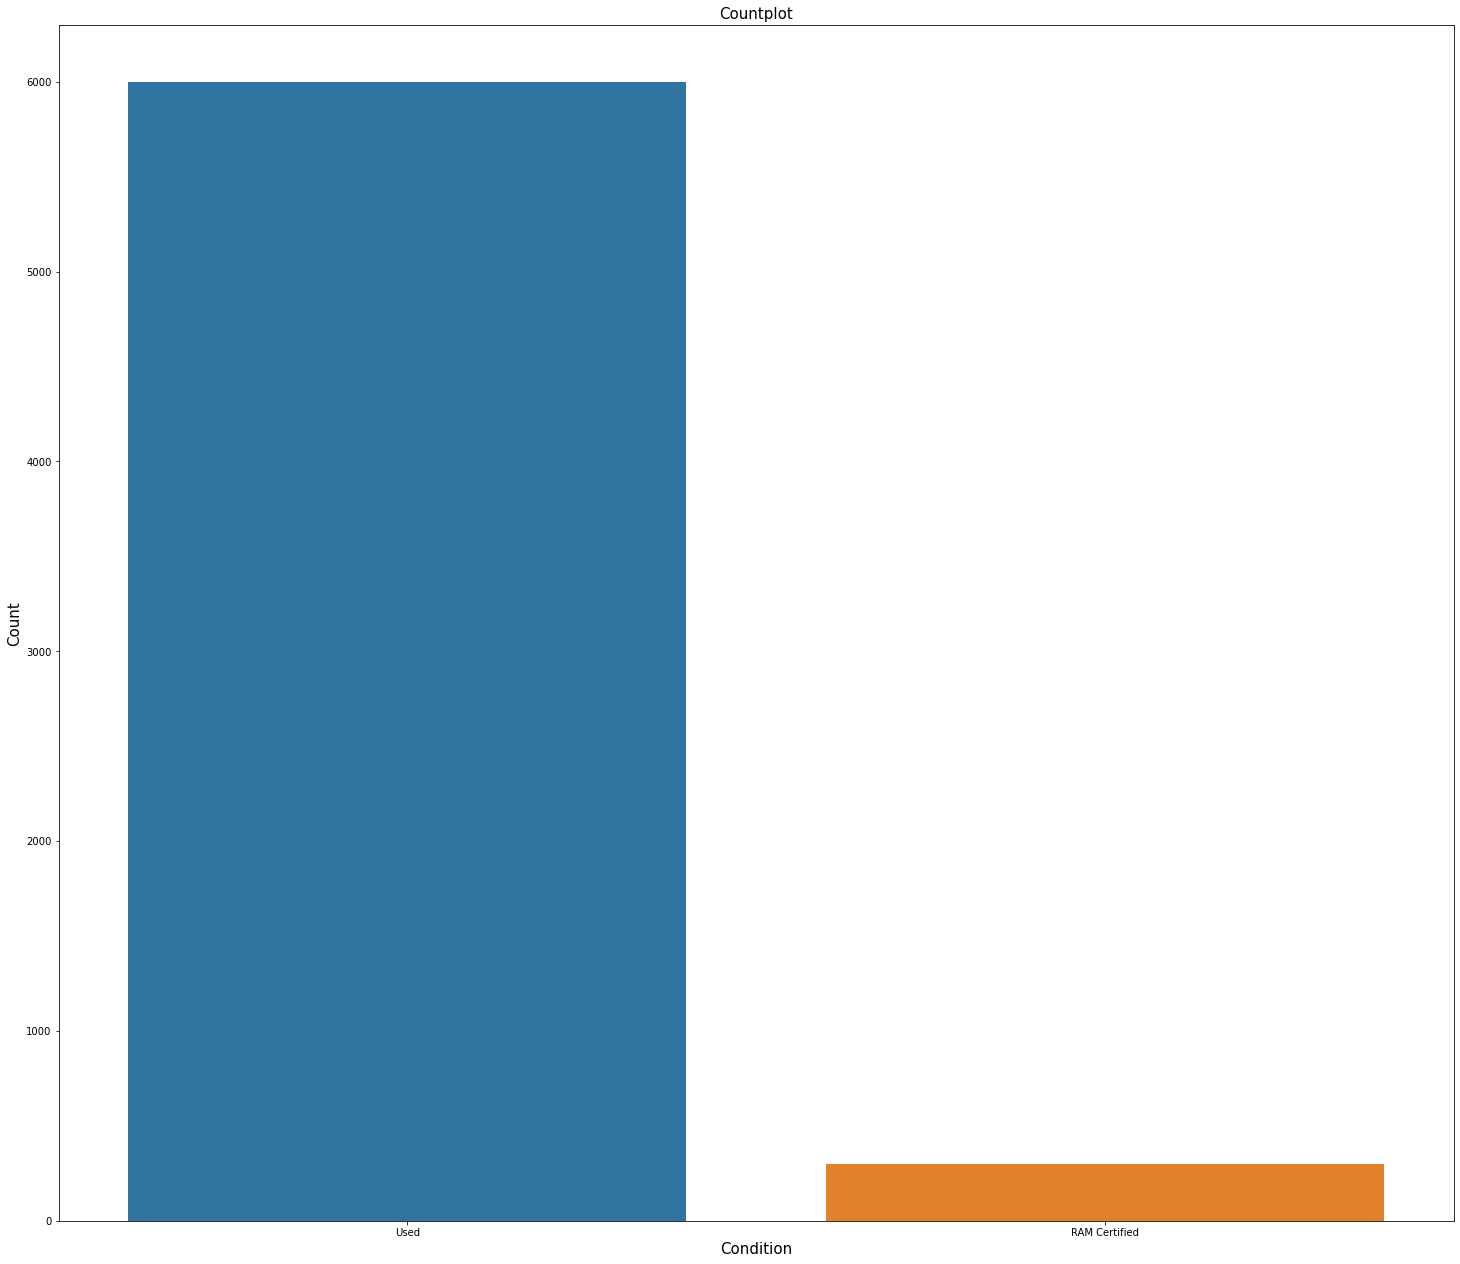

Used             6000
RAM Certified     300
Name: Condition, dtype: int64

In [139]:
plt.figure(figsize=(25,22))
sns.countplot('Condition',data = cars_data)
plt.xlabel('Condition', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['Condition'].value_counts()

Most of the cars are of used condition.

# Dealer

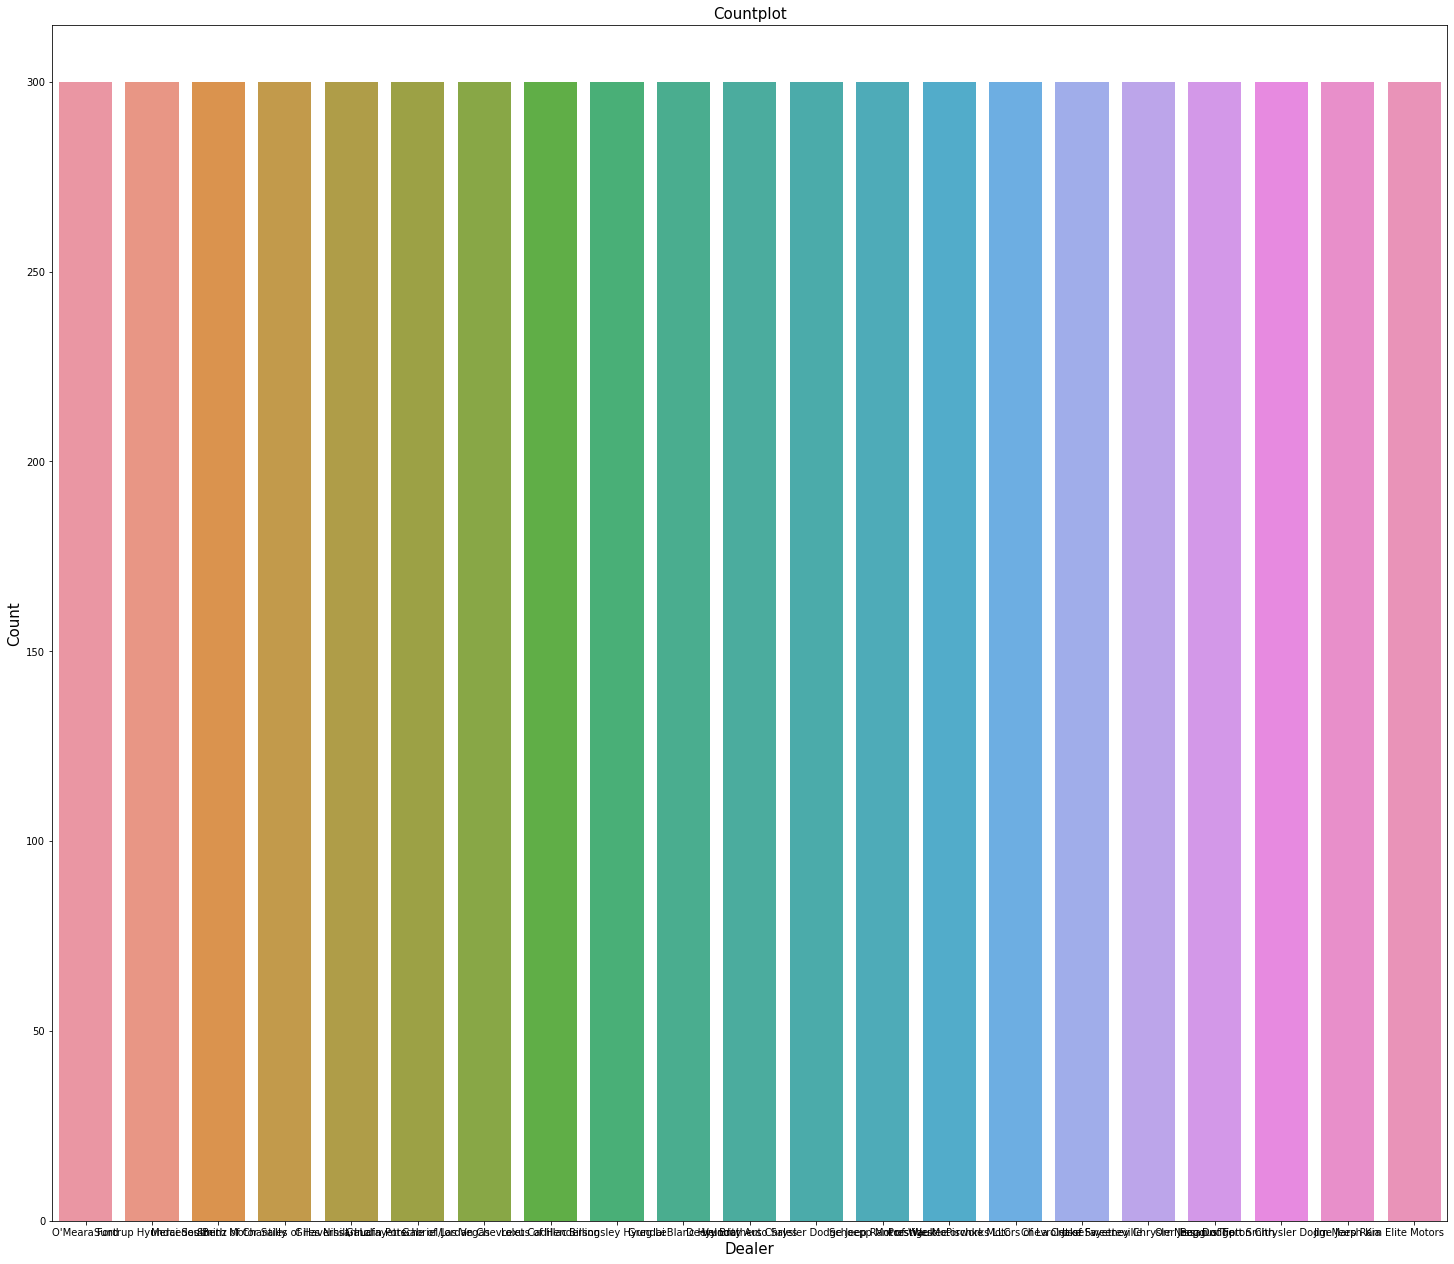

O'Meara Ford                                        300
Deery Brothers Chrysler Dodge Jeep Ram of Waukee    300
Jim Marsh Kia                                       300
Boggus Tipton Chrysler Dodge Jeep Ram               300
Orr Nissan of Fort Smith                            300
Jake Sweeney Chrysler Jeep Dodge                    300
Chevrolet of Fayetteville                           300
Pischke Motors of La Crosse                         300
Prestige Motorworks LLC                             300
Schoepp Motors West                                 300
Velocity Auto Sales                                 300
Suntrup Hyundai South                               300
Greg LeBlanc Hyundai                                300
Billingsley Hyundai                                 300
Lexus of Henderson                                  300
Gabriel/Jordan Chevrolet Cadillac                   300
Gaudin Porsche of Las Vegas                         300
Giles Nissan Lafayette                          

In [140]:
plt.figure(figsize=(25,22))
sns.countplot('Dealer',data = cars_data)
plt.xlabel('Dealer', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['Dealer'].value_counts()

There are total 21 dealers having equal numbers of vehicle i.e. 300.

# make_year

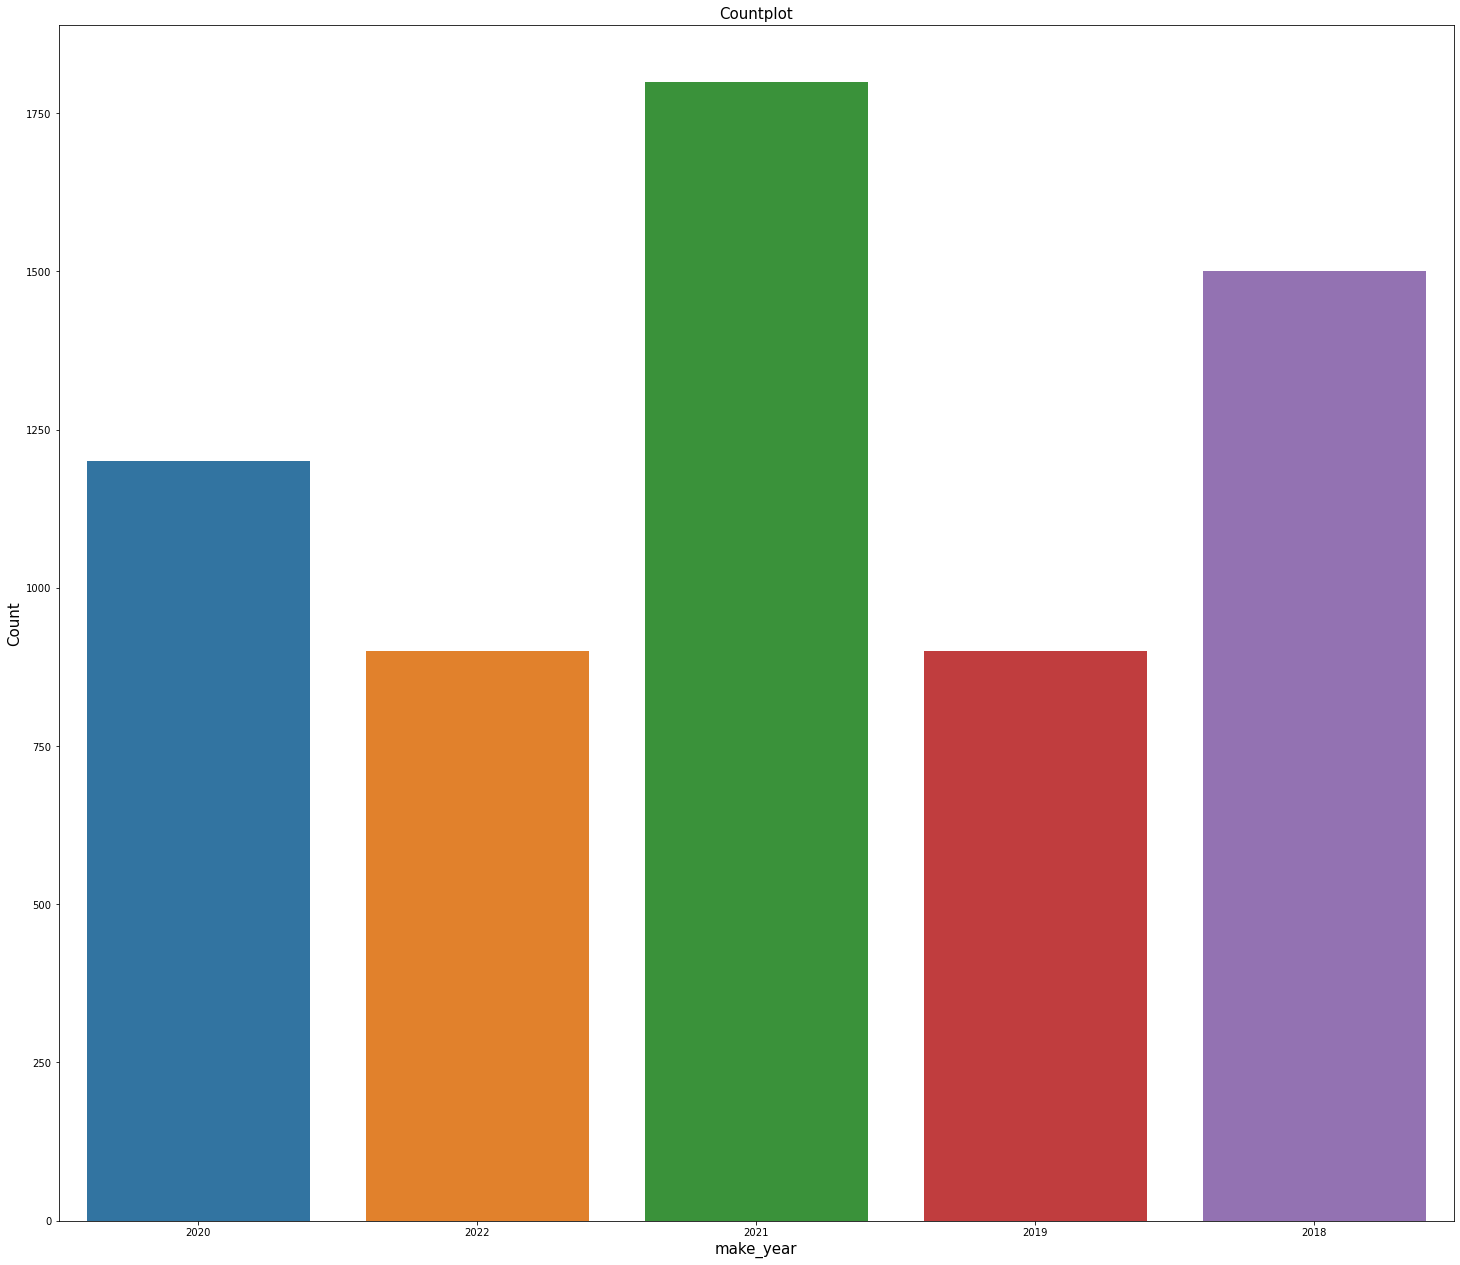

2021    1800
2018    1500
2020    1200
2022     900
2019     900
Name: make_year, dtype: int64

In [141]:
plt.figure(figsize=(25,22))
sns.countplot('make_year',data = cars_data)
plt.xlabel('make_year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['make_year'].value_counts()

Most of the cars are of make year 2021.

# car_model

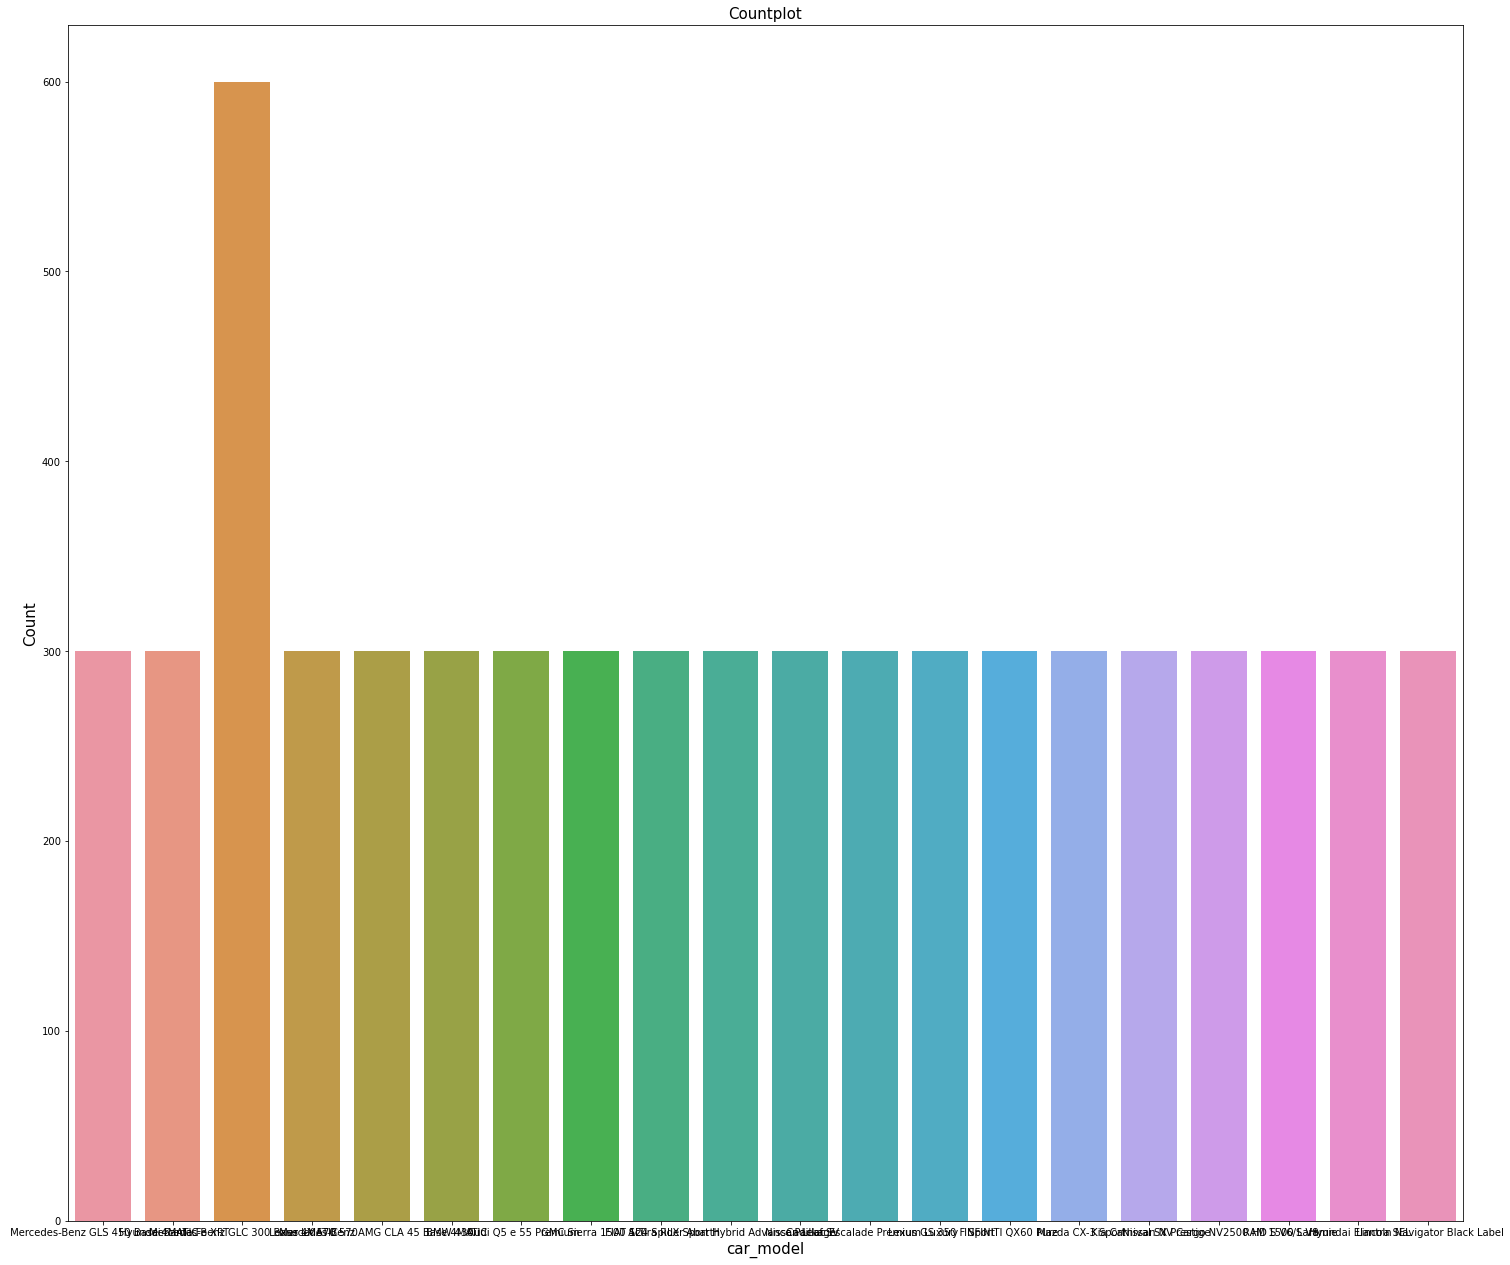

 Mercedes-Benz GLC 300 Base 4MATIC         600
 Mercedes-Benz GLS 450 Base 4MATIC         300
 Cadillac Escalade Premium Luxury          300
 Hyundai Elantra SEL                       300
 RAM 1500 Laramie                          300
 Nissan NV Cargo NV2500 HD S V6/S V8       300
 Kia Carnival SX Prestige                  300
 Mazda CX-3 Sport                          300
 INFINITI QX60 Pure                        300
 Lexus GS 350 F Sport                      300
 Nissan Leaf SV                            300
 Hyundai Santa Fe XRT                      300
 Acura RLX Sport Hybrid Advance Package    300
 FIAT 124 Spider Abarth                    300
 GMC Sierra 1500 SLT                       300
 Audi Q5 e 55 Premium                      300
 BMW 430 i                                 300
 Mercedes-Benz AMG CLA 45 Base 4MATIC      300
 Lexus LX 570 570                          300
 Lincoln Navigator Black Label             300
Name: car_model, dtype: int64

In [142]:
plt.figure(figsize=(25,22))
sns.countplot('car_model',data = cars_data)
plt.xlabel('car_model', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['car_model'].value_counts()

# Ratings

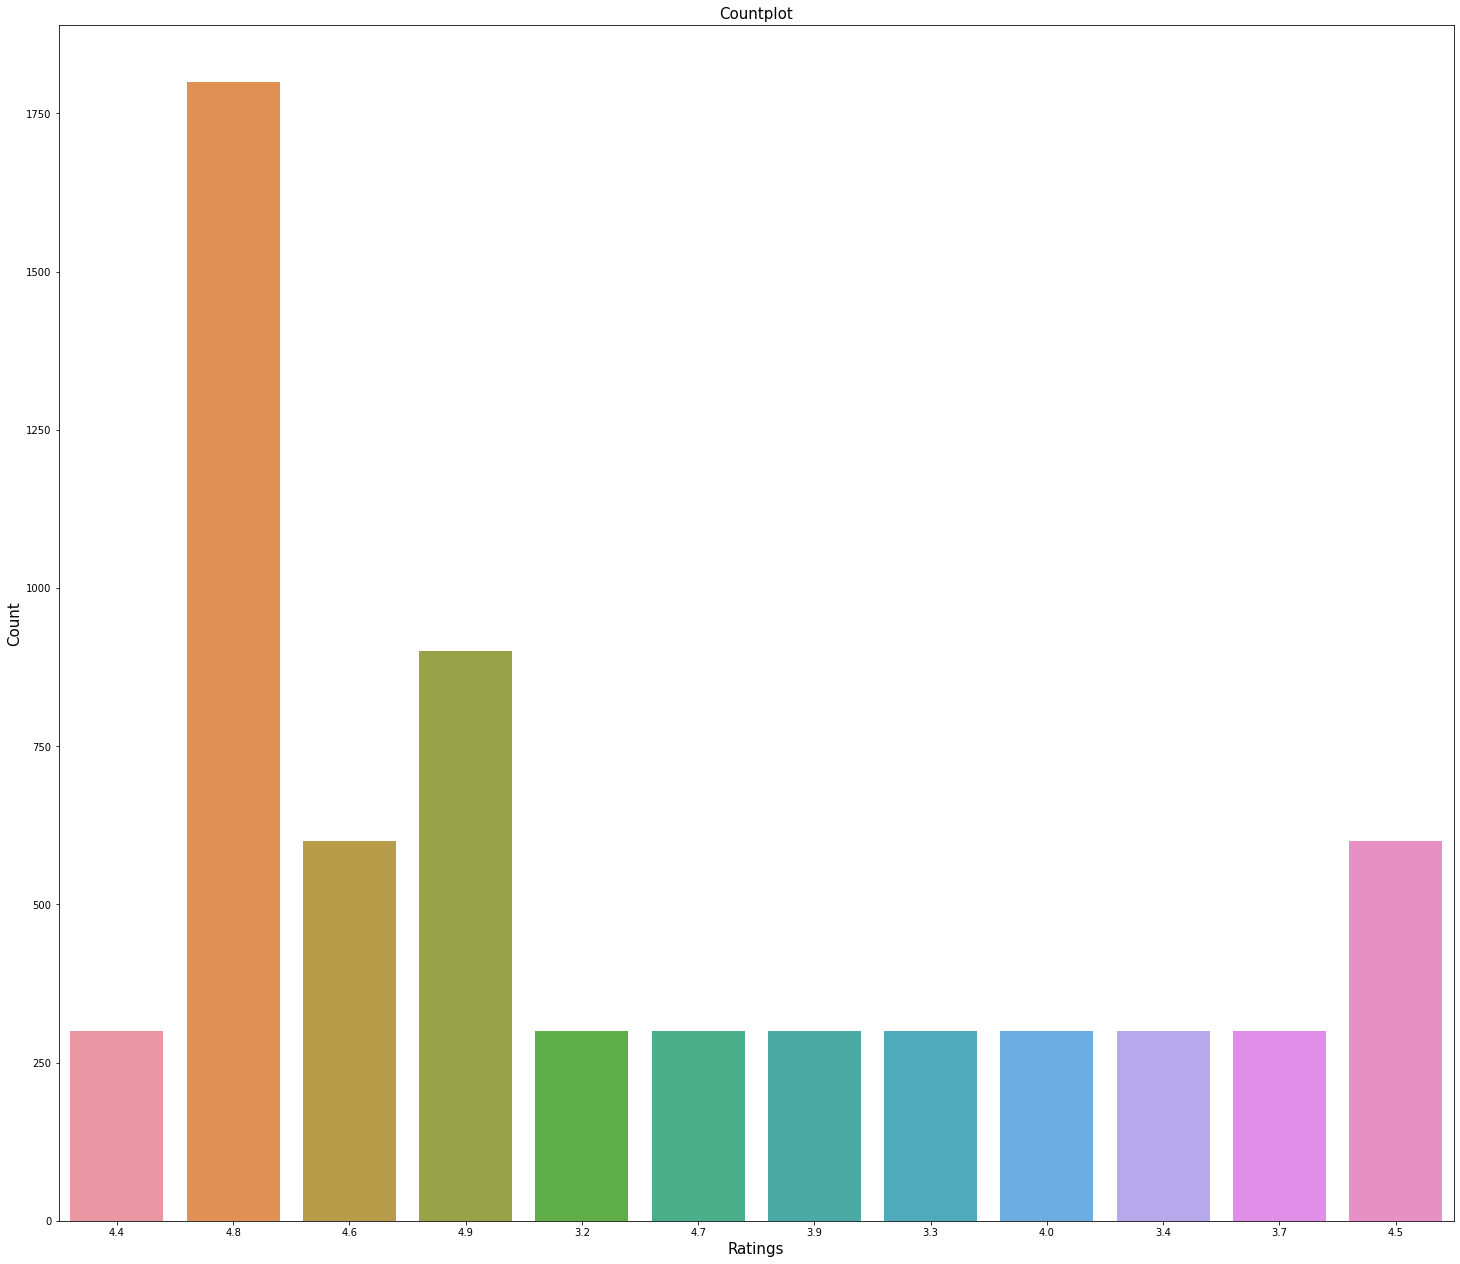

4.8    1800
4.9     900
4.6     600
4.5     600
4.4     300
3.2     300
4.7     300
3.9     300
3.3     300
4.0     300
3.4     300
3.7     300
Name: Ratings, dtype: int64

In [145]:
plt.figure(figsize=(25,22))
sns.countplot('Ratings',data = cars_data)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
cars_data['Ratings'].value_counts()

Maximum number of cars are with rating 4.8

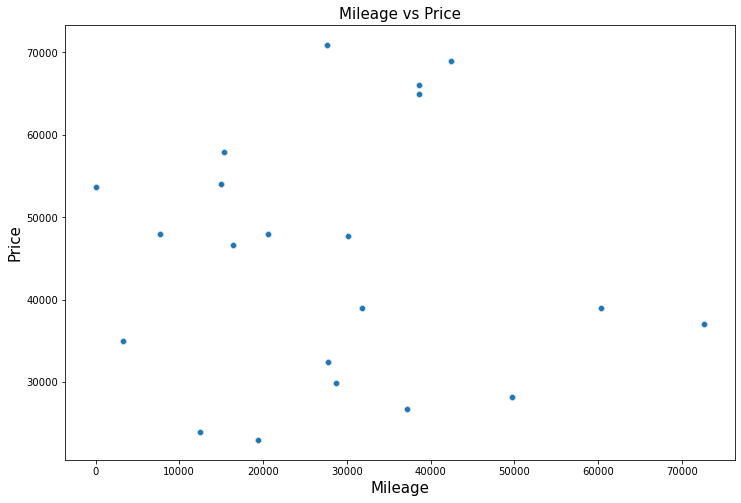

In [148]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mileage',y='Price',data=cars_data)

plt.xlabel('Mileage', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Mileage vs Price',fontsize=15)
plt.show()

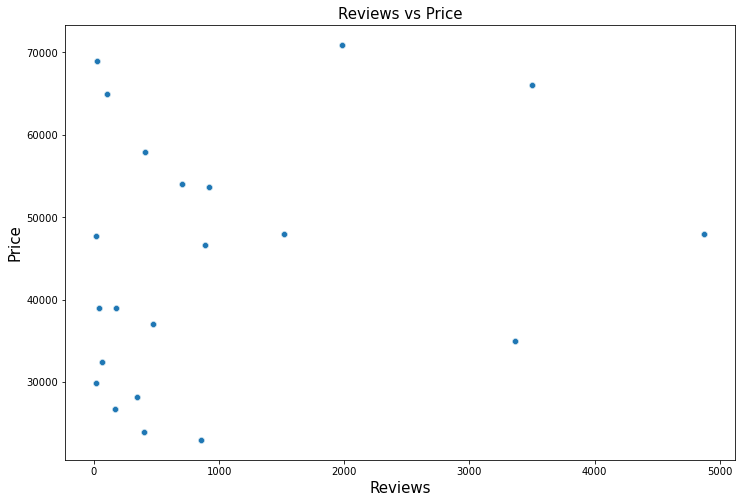

In [149]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Reviews',y='Price',data=cars_data)

plt.xlabel('Reviews', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Reviews vs Price',fontsize=15)
plt.show()

In [150]:
cars_data.describe()

,Mileage,Reviews,Price
count,6300.000000,6300.000000,6300.000000
mean,28359.238095,992.142857,44812.047619
std,17845.037096,1318.959789,14800.602294
min,0.000000,12.000000,22988.000000
25%,15282.000000,102.000000,32499.000000
50%,27804.000000,410.000000,46621.000000
75%,38606.000000,921.000000,54000.000000
max,72657.000000,4877.000000,70925.000000


In [151]:
cars_data.describe(include=object)

,Condition,Dealer,Ratings,make_year,car_model
count,6300,6300,6300,6300,6300
unique,2,21,12,5,20
top,Used,O'Meara Ford,4.8,2021,Mercedes-Benz GLC 300 Base 4MATIC
freq,6000,300,1800,1800,600


In [ ]:
num = ['Mileage','Reviews','Price']

In [154]:
cat = ['Condition','Dealer','Ratings','make_year','car_model']

# Label Encoding

In [155]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    cars_data[i] = le.fit_transform(cars_data[i])
cars_data.head()

,Condition,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
0,1,13,27617.0,6,1983.0,70925.0,2,16
1,1,19,3244.0,10,3368.0,34941.0,4,7
2,1,12,0.0,8,921.0,53660.0,4,15
3,1,18,7658.0,11,1516.0,47969.0,3,15
4,1,7,42469.0,0,24.0,68980.0,1,11


In [152]:
num = ['Mileage','Reviews','Price']

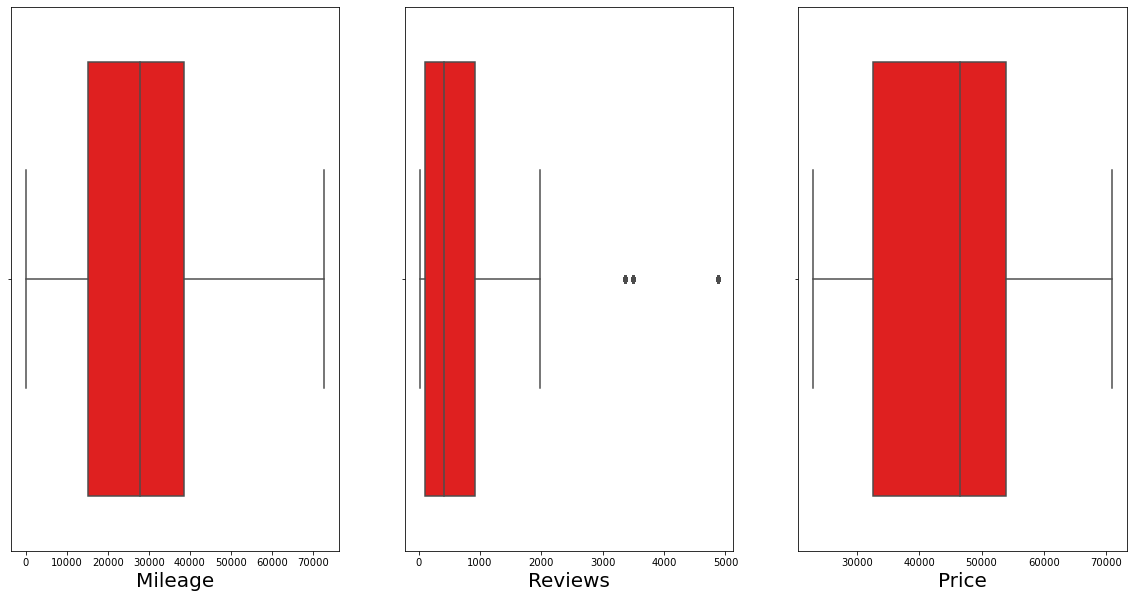

In [158]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(cars_data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers are present only in Reviews feature.

In [159]:
from scipy.stats import zscore
z = np.abs(zscore(cars_data))
threshold = 3
data = cars_data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", cars_data.shape)
print ("Shape of the dataframe after removing outliers: ", data.shape)
print ("Percentage of data loss post outlier removal: ", (cars_data.shape[0]-data.shape[0])/cars_data.shape[0]*100)



Shape of the dataframe before removing outliers:  (6300, 8)
Shape of the dataframe after removing outliers:  (6000, 8)
Percentage of data loss post outlier removal:  4.761904761904762


4.76% data lost while removing outliers which is affordable.

# Skewness

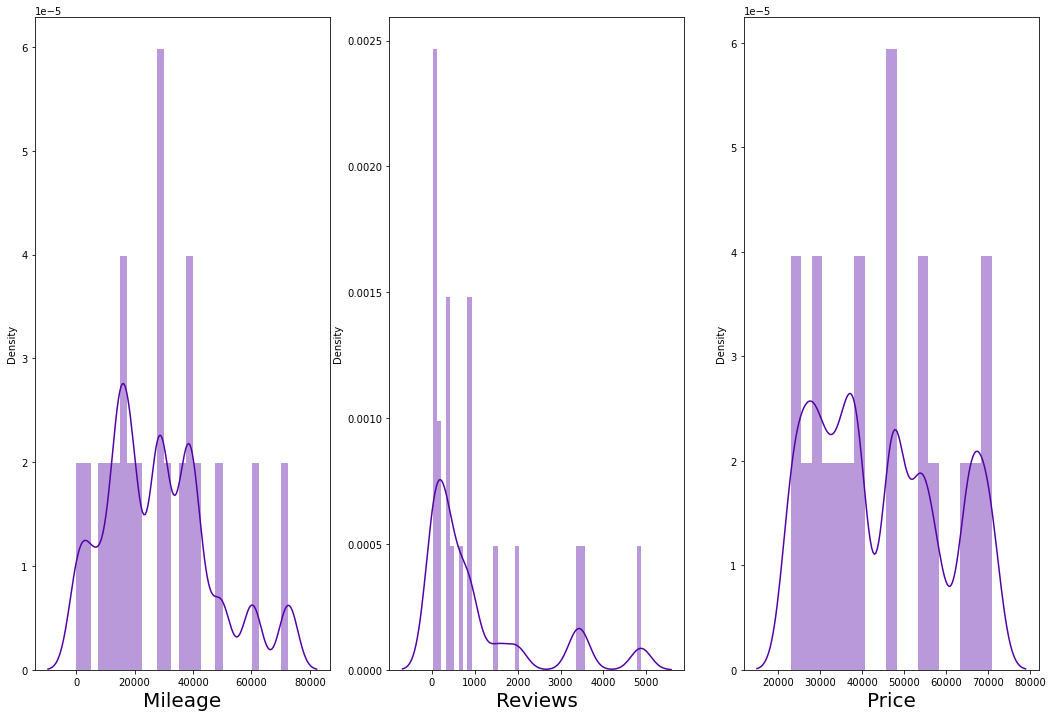

In [160]:
plt.figure(figsize=(18,12),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in num:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [161]:
data[num].skew()

Mileage    0.634253
Reviews    1.637520
Price      0.266387
dtype: float64

In [162]:
skew=['Reviews','Mileage']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
data[skew] = scaler.fit_transform(data[skew].values)

In [163]:
data[skew].skew()

Reviews   -0.054025
Mileage   -0.456494
dtype: float64

# Correlation

In [173]:
data.corr()['Price'].sort_values()

Ratings     -0.038659
Mileage     -0.032680
make_year    0.047424
Dealer       0.143468
Reviews      0.198641
car_model    0.268491
Price        1.000000
Condition         NaN
Name: Price, dtype: float64

Since, the feature 'Condition' is showing correlation 'NaN' which is because of there exist more identical values.
'NaN' means no correlation. So we will drop this feature.

In [174]:
data.drop(columns=['Condition'],axis=1,inplace=True)

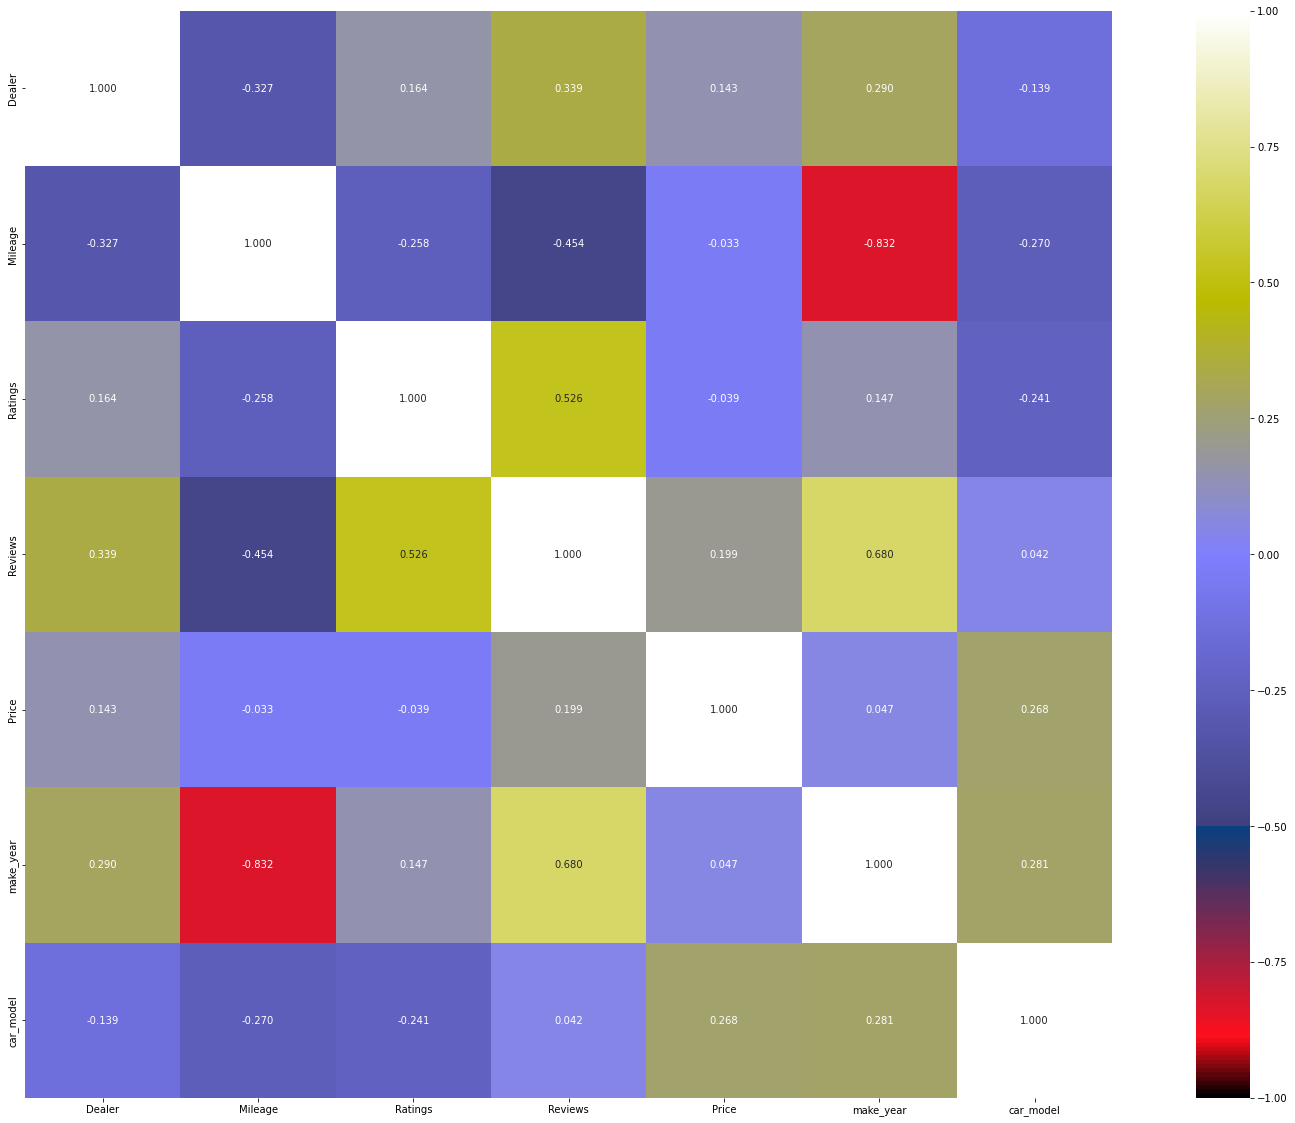

In [175]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

In [176]:
data.corr()

,Dealer,Mileage,Ratings,Reviews,Price,make_year,car_model
Dealer,1.000000,-0.326846,0.163886,0.339357,0.143468,0.290111,-0.139435
Mileage,-0.326846,1.000000,-0.258023,-0.454432,-0.032680,-0.832490,-0.270296
Ratings,0.163886,-0.258023,1.000000,0.526322,-0.038659,0.147492,-0.240610
Reviews,0.339357,-0.454432,0.526322,1.000000,0.198641,0.680307,0.041968
Price,0.143468,-0.032680,-0.038659,0.198641,1.000000,0.047424,0.268491
make_year,0.290111,-0.832490,0.147492,0.680307,0.047424,1.000000,0.281161
car_model,-0.139435,-0.270296,-0.240610,0.041968,0.268491,0.281161,1.000000


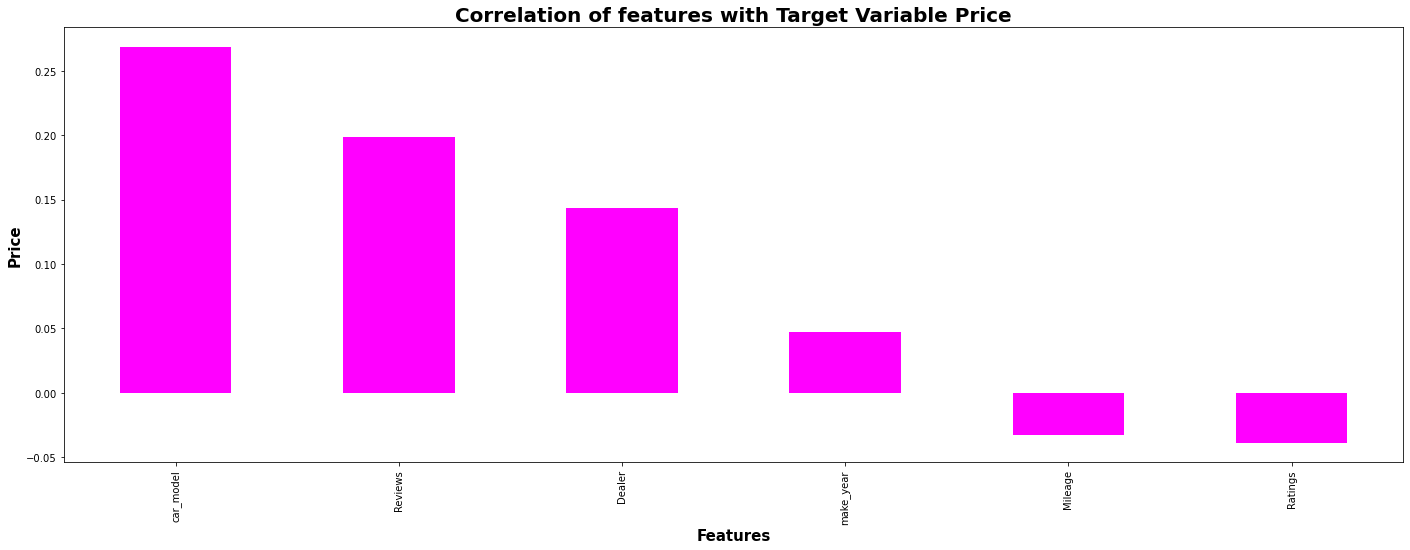

In [177]:
plt.figure(figsize = (24,8))
data.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

# Splitting Data into target and features

In [178]:
Y = data['Price']
X = data.drop(['Price'], axis =1)

# Feature Scaling

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
sc= StandardScaler()
X_scale = sc.fit_transform(X)

# Multicollinearity

Here we will use the VIF method to check for multicollinearity

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.313124,Dealer
1,5.495460,Mileage
2,2.414040,Ratings
3,4.378043,Reviews
4,8.423307,make_year
5,1.310693,car_model


All the Independent features VIF are within the permissible limit of 10 which means there is no multicollinearity present.

# Model Building

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (4020, 6)
Training target vector size: (4020,)
Test feature matrix size: (1980, 6)
Test target vector size: (1980,)


# Finding Best random state

In [185]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.2572947557854236 on Random_state 320


# Linear Regression Model

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=320, test_size=.33)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_lr))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_lr)))
print('R2_Score :' ,r2_score(Y_test,y_pred_lr))
print('CV_Score_lr : ',cross_val_score(lr, X_scale, Y, cv =5).mean())

Mean absolute error : 10928.748930317317
Mean squared error : 170694555.31166276
Root Mean Squared Error: 13065.01264108316
R2_Score : 0.2572947557854236
CV_Score_lr :  0.21910741873350678


# RandomForestRegressor

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=320, test_size=.33)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_rf)))
print('R2_Score :' ,r2_score(Y_test,y_pred_rf))
print('CV_Score_rf : ',cross_val_score(rf, X_scale, Y, cv =5).mean())

Mean absolute error : 0.0
Mean squared error : 0.0
Root Mean Squared Error: 0.0
R2_Score : 1.0
CV_Score_rf :  1.0


# DecisionTreeRegressor

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=320, test_size=.33)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_dt)))
print('R2_Score :' ,r2_score(Y_test,y_pred_dt))
print('CV_Score_dt : ',cross_val_score(dt, X_scale, Y, cv =5).mean())

Mean absolute error : 0.0
Mean squared error : 0.0
Root Mean Squared Error: 0.0
R2_Score : 1.0
CV_Score_dt :  1.0


# KNeighborsRegressor

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=320, test_size=.33)
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_knn))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_knn)))
print('R2_Score :' ,r2_score(Y_test,y_pred_knn))
print('CV_Score_dt : ',cross_val_score(knn, X_scale, Y, cv =5).mean())

Mean absolute error : 0.0
Mean squared error : 0.0
Root Mean Squared Error: 0.0
R2_Score : 1.0
CV_Score_dt :  1.0


# AdaBoostRegressor

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=320, test_size=.33)
ab=AdaBoostRegressor()
ab.fit(X_train,Y_train)
ab.score(X_train,Y_train)
y_pred_ab=ab.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_ab))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_ab))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_ab)))
print('R2_Score :' ,r2_score(Y_test,y_pred_ab))
print('CV_Score_ab : ',cross_val_score(ab, X_scale, Y, cv =5).mean())

Mean absolute error : 3716.1827050476004
Mean squared error : 23154733.21779939
Root Mean Squared Error: 4811.936535096799
R2_Score : 0.8992519605686915
CV_Score_ab :  0.9034386164228932


Among all the algorithms used Random Forest Regressor, DecisionTreeRegressor and KNeighborsRegressor gives us better R2 Score with zero Root Mean Squared Error.
Out of these 3 we will select Random Forest Regressor as final model and perform Hyperparameter optimization for this model

# Hyperparameter Optimization

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
n_estimators = [2,5,7,9,15]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [1,4]
min_samples_split = [1,5]
min_samples_leaf = [2,6]
bootstrap = ['true','false']

In [193]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [194]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [195]:
best_clf = clf.fit(X,Y)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [184]:
best_clf.best_estimator_

RandomForestRegressor(bootstrap='true', max_depth=4, max_features='auto',
                      min_samples_leaf=6, min_samples_split=5, n_estimators=15)

In [196]:
param_score_rf = round(best_clf.score(X,Y),3)
param_score_rf

0.95

# Model Saving

In [197]:
import pickle

In [198]:
filename = "CarPricePrediction"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [199]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

100.0


# Prediction on Test Data

In [200]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021